In [1]:
import time

import functions as fs

import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import pandas_ta as pta
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
ticker = "BTC-USD"
start_date = "2013-01-01"
end_date = "2023-01-01"

day_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1d").getdata()
week_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1wk").getdata()
month_data = fs.yahoodata(ticker=ticker,
                        period1=start_date,
                        period2=end_date,
                        interval="1mo").getdata()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
data_base = {"Daily": day_data["Close"], "Weekly": week_data["Close"], "Monthly": month_data["Close"]}
data_base


{'Daily': Date
 2014-09-17      457.334015
 2014-09-18      424.440002
 2014-09-19      394.795990
 2014-09-20      408.903992
 2014-09-21      398.821014
                   ...     
 2022-12-27    16717.173828
 2022-12-28    16552.572266
 2022-12-29    16642.341797
 2022-12-30    16602.585938
 2022-12-31    16547.496094
 Name: Close, Length: 3028, dtype: float64,
 'Weekly': Date
 2014-09-15      398.821014
 2014-09-22      377.181000
 2014-09-29      320.510010
 2014-10-06      378.549011
 2014-10-13      389.545990
                   ...     
 2022-11-28    17130.486328
 2022-12-05    17104.193359
 2022-12-12    16757.976562
 2022-12-19    16841.986328
 2022-12-26    16625.080078
 Name: Close, Length: 433, dtype: float64,
 'Monthly': Date
 2014-10-01      338.321014
 2014-11-01      378.046997
 2014-12-01      320.192993
 2015-01-01      217.464005
 2015-02-01      254.263000
                   ...     
 2022-08-01    20049.763672
 2022-09-01    19431.789062
 2022-10-01    20495.7734

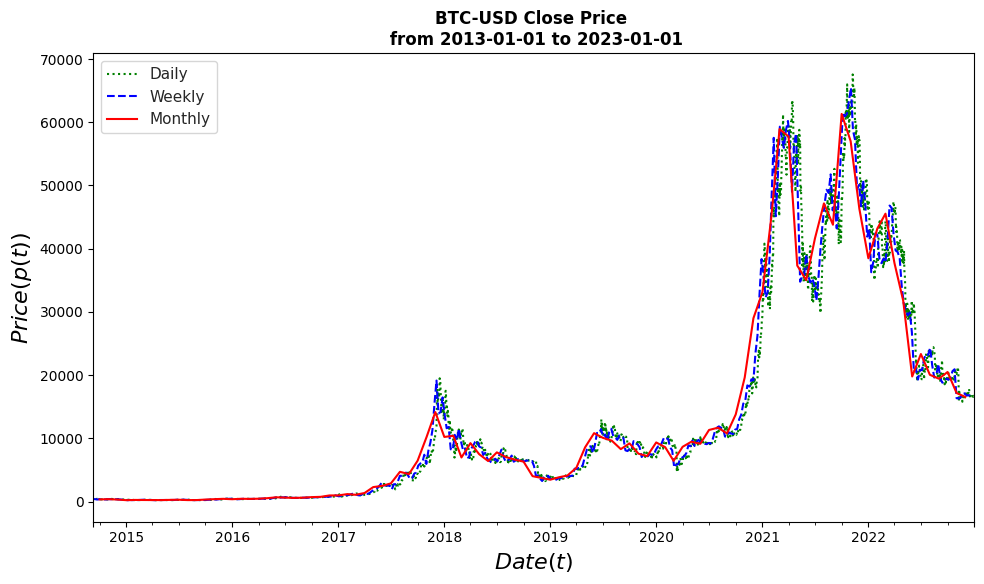

In [4]:
for (interval, price), linestyle, color in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"]):
    price.plot(y="Close", label=interval, color=color, figsize=(10,6), linestyle=linestyle)
plt.xlabel(xlabel="$Date (t)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Price (p(t))$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"{ticker} Close Price \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.show();

In [5]:
returns = []
for intervals, prices in data_base.items():
    returns.append(fs.log_returns(prices))
returns = dict(zip(data_base.keys(), returns))
returns

{'Daily': Date
 2014-09-17         NaN
 2014-09-18   -0.074643
 2014-09-19   -0.072402
 2014-09-20    0.035111
 2014-09-21   -0.024968
                 ...   
 2022-12-27   -0.012048
 2022-12-28   -0.009895
 2022-12-29    0.005409
 2022-12-30   -0.002392
 2022-12-31   -0.003324
 Name: Close, Length: 3028, dtype: float64,
 'Weekly': Date
 2014-09-15         NaN
 2014-09-22   -0.055788
 2014-09-29   -0.162812
 2014-10-06    0.166432
 2014-10-13    0.028636
                 ...   
 2022-11-28    0.040861
 2022-12-05   -0.001536
 2022-12-12   -0.020449
 2022-12-19    0.005001
 2022-12-26   -0.012963
 Name: Close, Length: 433, dtype: float64,
 'Monthly': Date
 2014-10-01         NaN
 2014-11-01    0.111023
 2014-12-01   -0.166095
 2015-01-01   -0.386891
 2015-02-01    0.156336
                 ...   
 2022-08-01   -0.151818
 2022-09-01   -0.031307
 2022-10-01    0.053308
 2022-11-01   -0.177139
 2022-12-01   -0.036845
 Name: Close, Length: 99, dtype: float64}

<Figure size 640x480 with 0 Axes>

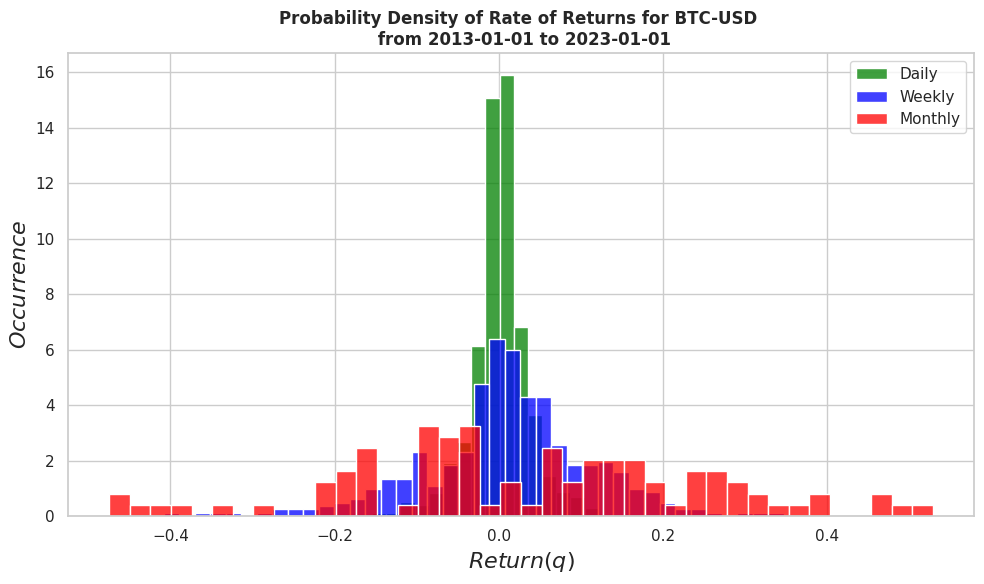

In [6]:
plt.cla()
plt.clf()
fig = plt.figure(figsize = (10,6))


for (interval, Return), linestyle, color in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"]):
    sns.histplot(returns[interval], stat="density", label=interval, color=color, bins=40, edgecolor='white')
    

plt.xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
plt.ylabel(ylabel="$Occurrence$", fontweight="bold", style="italic", fontsize = 16)
plt.title(f"Probability Density of Rate of Returns for {ticker} \n from {start_date} to {end_date}", fontweight="bold")
sns.set(style="whitegrid")
plt.legend()
plt.tight_layout()
plt.show();

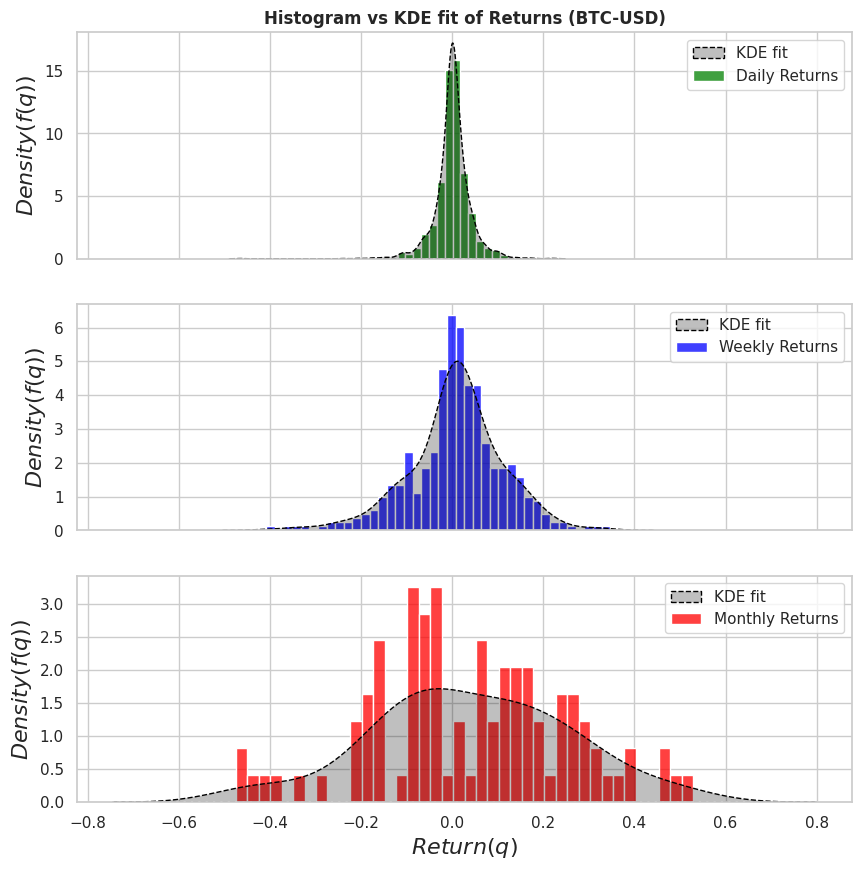

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Histogram vs KDE fit of Returns ({})".format(ticker), fontweight="bold")
for (interval, Return), linestyle, color, ax in zip(data_base.items(), [":", "--", "-"], ["green", "blue", "red"], axes):
    sns.histplot(returns[interval], ax=ax, stat="density", label=interval + ' Returns', color=color, bins=40, edgecolor='white')
    sns.kdeplot(returns[interval], ax=ax, color="black", common_norm=True, bw_method="silverman", gridsize=grid_size, linestyle="--", linewidth=1, label="KDE fit", fill=True)
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.show()

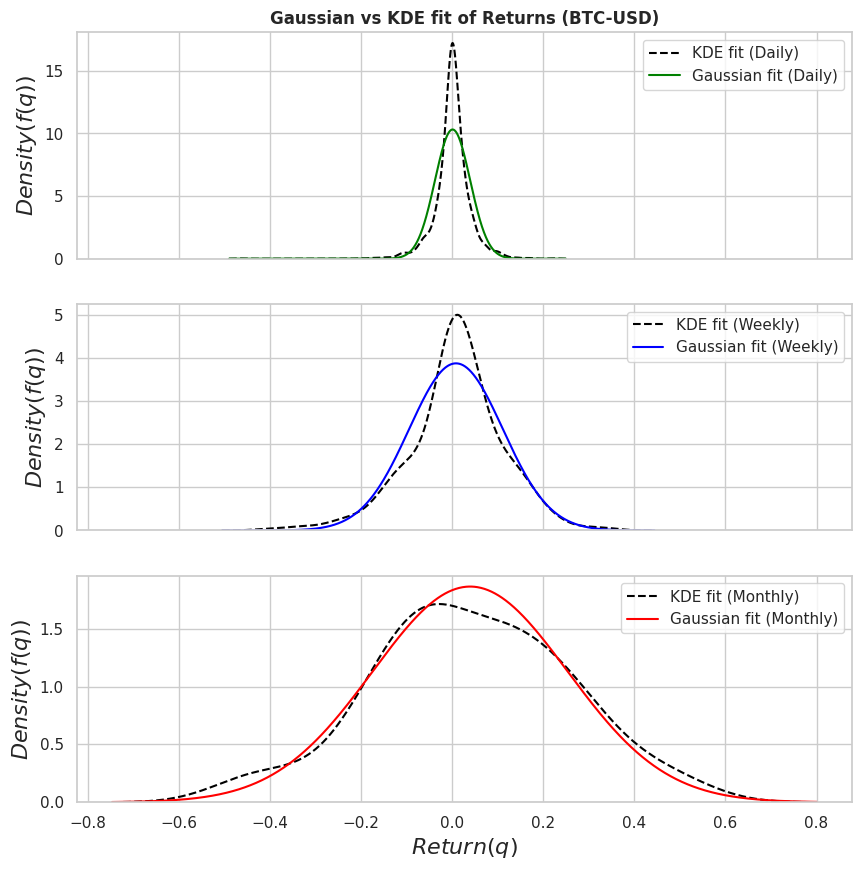

In [8]:
PDF = []
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=True)
grid_size = 1000
axes[0].set_title("Gaussian vs KDE fit of Returns ({})".format(ticker), fontweight="bold")
for (interval, Return), color, ax in zip(data_base.items(), ["green", "blue", "red"], axes):
    PDF = fs.density_function(returns[interval], size=grid_size,
                              common_norm=False, color='black',
                              clf=False, ax=ax, linestyle='--',
                              label=f'KDE fit ({interval})')
    GDF = fs.gaussian_fit(returns=returns[interval], reph_returns=PDF["Rephurbished Returns"])
    sns.lineplot(x=PDF["Rephurbished Returns"], y=GDF, ax=ax, color=color, label=f'Gaussian fit ({interval})', linestyle='-')
    ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
    ax.legend()

ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")
plt.show();

In [9]:
period = 30
keys = [keys for keys, _ in returns.items()]
Means = dict(zip(keys, [returns[interval].rolling(period).mean() for interval in returns]))
StandardDeviation = dict(zip(keys, [returns[interval].rolling(period).std() for interval in returns]))
Skews = dict(zip(keys, [returns[interval].rolling(period).skew() for interval in returns]))
Kurts = dict(zip(keys, [returns[interval].rolling(period).kurt() for interval in returns]))

<Figure size 640x480 with 0 Axes>

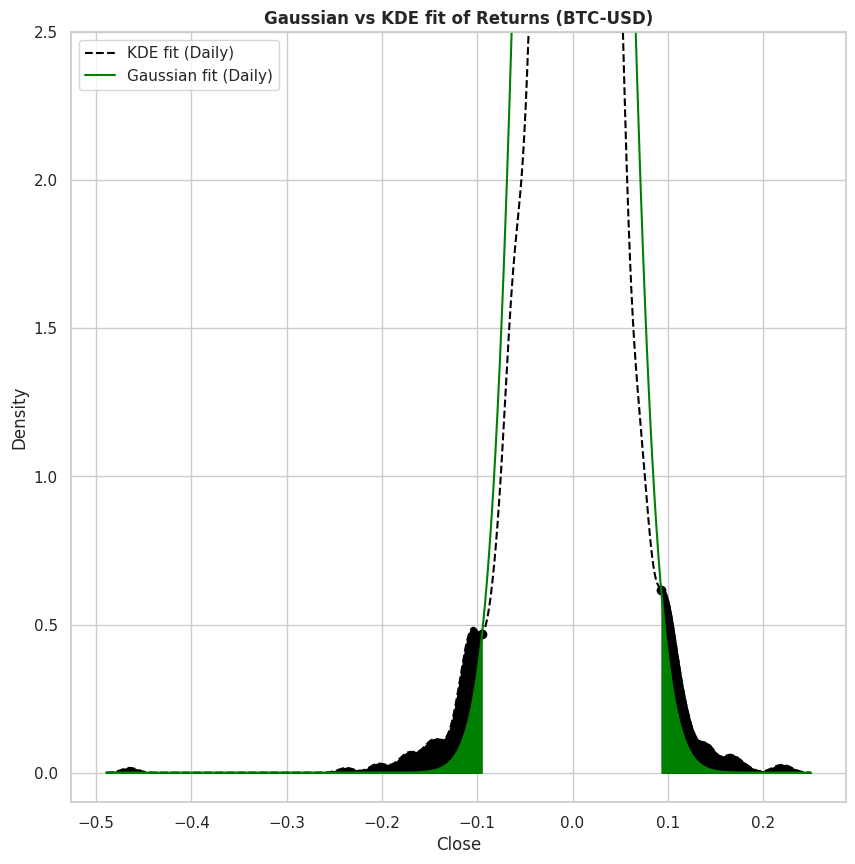

In [30]:
PDF = []
grid_size = 1000
intesection_points = [points for _, points in fs.intersection_points(returns["Daily"], grid_size=grid_size).items()]
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), sharex=True)

ax1.set_title("Gaussian vs KDE fit of Returns ({})".format(ticker), fontweight="bold")
PDF = fs.density_function(returns["Daily"], size=grid_size,
                            common_norm=False, color='black',
                            clf=False, ax=ax1, linestyle='--',
                            label=f'KDE fit (Daily)')
GDF = fs.gaussian_fit(returns=returns["Daily"], reph_returns=PDF["Rephurbished Returns"])

sns.lineplot(x=PDF["Rephurbished Returns"], y=GDF, ax=ax1, color="green", label=f'Gaussian fit (Daily)', linestyle='-')
ax.set_ylabel(ylabel="$Density(f(q))$", fontweight="bold", style="italic", fontsize = 16)
ax.legend()
ax.set_xlabel(xlabel="$Return(q)$", fontweight="bold", style="italic", fontsize = 16)
sns.set(style="whitegrid")


ax1.fill_between(PDF["Rephurbished Returns"], PDF["Probability Density"], 
                 where = (PDF["Rephurbished Returns"].index < intesection_points[0]),
                 interpolate=True, color="black")
ax1.fill_between(PDF["Rephurbished Returns"], PDF["Probability Density"], 
                 where = (PDF["Rephurbished Returns"].index > intesection_points[1]),
                 interpolate=True, color="black")
ax1.fill_between(PDF["Rephurbished Returns"], GDF, 
                 where = (PDF["Rephurbished Returns"].index < intesection_points[0]),
                 interpolate=True, color="green")
ax1.fill_between(PDF["Rephurbished Returns"], GDF, 
                 where = (PDF["Rephurbished Returns"].index > intesection_points[1]),
                 interpolate=True, color="green")

ax1.scatter(x=PDF["Rephurbished Returns"][533], y=GDF[533], color='black', marker='o')
ax1.scatter(x=PDF["Rephurbished Returns"][787], y=GDF[787], color='black', marker='o')
# ax1.fill_between(PDF["Rephurbished Returns"], GDF, 
#                  where = (PDF["Rephurbished Returns"] < first_quantile),
#                  interpolate=True, color="green")
# ax1.fill_between(PDF["Rephurbished Returns"], PDF["Probability Density"], 
#                  where = (PDF["Rephurbished Returns"] > third_quantile),
#                  interpolate=True, color="black")

ax1.set_ylim([-0.1, 2.5])
plt.show()
